This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 9s 11ms/step - loss: 0.6049 - accuracy: 0.8145 - val_loss: 0.2556 - val_accuracy: 0.9215
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2568 - accuracy: 0.9217 - val_loss: 0.1788 - val_accuracy: 0.9455
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1680 - accuracy: 0.9476 - val_loss: 0.1641 - val_accuracy: 0.9508
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1193 - accuracy: 0.9624 - val_loss: 0.1679 - val_accuracy: 0.9477
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0898 - accuracy: 0.9716 - val_loss: 0.1147 - val_accuracy: 0.9659
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0656 - accuracy: 0.9793 - val_loss: 0.1314 - val_accuracy: 0.9638
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0490 - accuracy: 0.9842 - val_loss: 0.1202 - val_accuracy: 0.9662
Epoch

**Plotting a validation accuracy comparison**

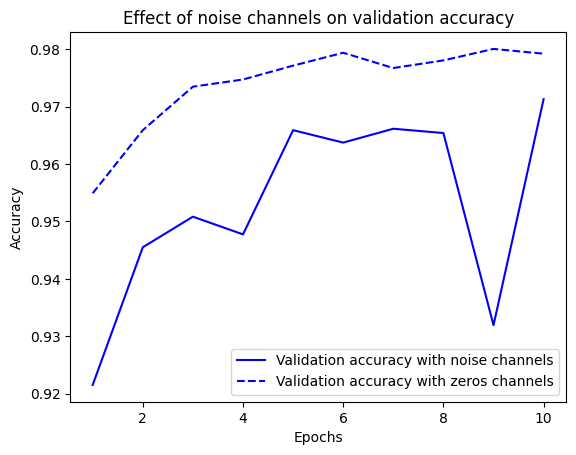

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3163 - accuracy: 0.1002 - val_loss: 2.3070 - val_accuracy: 0.1056
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2992 - accuracy: 0.1165 - val_loss: 2.3109 - val_accuracy: 0.1010
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2923 - accuracy: 0.1247 - val_loss: 2.3176 - val_accuracy: 0.1036
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2811 - accuracy: 0.1374 - val_loss: 2.3214 - val_accuracy: 0.0998
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2665 - accuracy: 0.1490 - val_loss: 2.3301 - val_accuracy: 0.1056
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2480 - accuracy: 0.1644 - val_loss: 2.3400 - val_accuracy: 0.0995
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2254 - accuracy: 0.1766 - val_loss: 2.3593 - val_accuracy: 0.1057

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 605.9507 - accuracy: 0.2362 - val_loss: 2.3889 - val_accuracy: 0.1411
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 2.7331 - accuracy: 0.1485 - val_loss: 2.4054 - val_accuracy: 0.1205
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5383 - accuracy: 0.1559 - val_loss: 2.5672 - val_accuracy: 0.1483
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5132 - accuracy: 0.1498 - val_loss: 2.2327 - val_accuracy: 0.1674
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 2.3935 - accuracy: 0.1458 - val_loss: 2.3140 - val_accuracy: 0.1822
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 2.4118 - accuracy: 0.1758 - val_loss: 2.3361 - val_accuracy: 0.1689
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6035 - accuracy: 0.1808 - val_loss: 2.2792 - val_accuracy: 0.1500
Epoc

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3483 - accuracy: 0.9125 - val_loss: 0.1360 - val_accuracy: 0.9608
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1238 - accuracy: 0.9648 - val_loss: 0.1249 - val_accuracy: 0.9676
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0976 - accuracy: 0.9742 - val_loss: 0.1741 - val_accuracy: 0.9629
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0824 - accuracy: 0.9786 - val_loss: 0.1590 - val_accuracy: 0.9691
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0686 - accuracy: 0.9826 - val_loss: 0.1568 - val_accuracy: 0.9715
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0586 - accuracy: 0.9860 - val_loss: 0.1703 - val_accuracy: 0.9717
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0521 - accuracy: 0.9881 - val_loss: 0.1770 - val_accuracy: 0.9726
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.6599 - accuracy: 0.8417 - val_loss: 0.3611 - val_accuracy: 0.9037
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3522 - accuracy: 0.9022 - val_loss: 0.3094 - val_accuracy: 0.9156
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3174 - accuracy: 0.9118 - val_loss: 0.2926 - val_accuracy: 0.9184
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3018 - accuracy: 0.9154 - val_loss: 0.2840 - val_accuracy: 0.9216
Epoch 5/20
375/375 [==============================] - 3s 8ms/step - loss: 0.2920 - accuracy: 0.9186 - val_loss: 0.2800 - val_accuracy: 0.9222
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2852 - accuracy: 0.9200 - val_loss: 0.2742 - val_accuracy: 0.9262
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2804 - accuracy: 0.9219 - val_loss: 0.2728 - val_accuracy: 0.9260
Epoch 

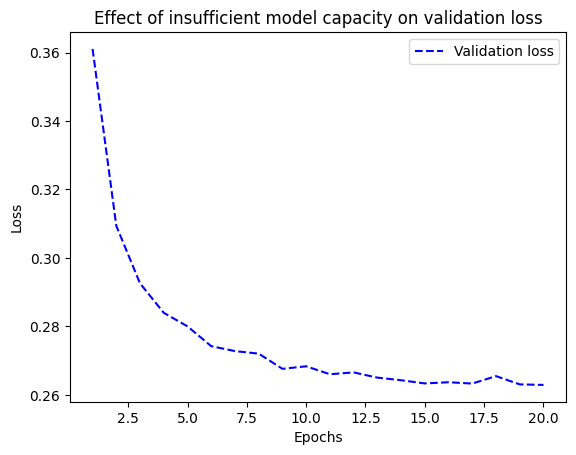

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3695 - accuracy: 0.8971 - val_loss: 0.1906 - val_accuracy: 0.9458
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1661 - accuracy: 0.9508 - val_loss: 0.1378 - val_accuracy: 0.9600
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1193 - accuracy: 0.9645 - val_loss: 0.1181 - val_accuracy: 0.9664
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0910 - accuracy: 0.9725 - val_loss: 0.1063 - val_accuracy: 0.9701
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0722 - accuracy: 0.9781 - val_loss: 0.1025 - val_accuracy: 0.9699
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0595 - accuracy: 0.9819 - val_loss: 0.1094 - val_accuracy: 0.9704
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0499 - accuracy: 0.9845 - val_loss: 0.0966 - val_accuracy: 0.9741
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 4s 81ms/step - loss: 0.5295 - accuracy: 0.7825 - val_loss: 0.3996 - val_accuracy: 0.8707
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3289 - accuracy: 0.8939 - val_loss: 0.3168 - val_accuracy: 0.8841
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2488 - accuracy: 0.9151 - val_loss: 0.2910 - val_accuracy: 0.8867
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2003 - accuracy: 0.9325 - val_loss: 0.2845 - val_accuracy: 0.8858
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1713 - accuracy: 0.9439 - val_loss: 0.2777 - val_accuracy: 0.8888
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1438 - accuracy: 0.9531 - val_loss: 0.2912 - val_accuracy: 0.8834
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1269 - accurac

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 64ms/step - loss: 0.6213 - accuracy: 0.6718 - val_loss: 0.5605 - val_accuracy: 0.7335
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5182 - accuracy: 0.8250 - val_loss: 0.4927 - val_accuracy: 0.8502
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4407 - accuracy: 0.8851 - val_loss: 0.4282 - val_accuracy: 0.8589
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3613 - accuracy: 0.9140 - val_loss: 0.3654 - val_accuracy: 0.8861
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2955 - accuracy: 0.9267 - val_loss: 0.3256 - val_accuracy: 0.8865
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2488 - accuracy: 0.9345 - val_loss: 0.3124 - val_accuracy: 0.8812
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2155 - accuracy: 0.9423 - val_loss: 0.2878 - val_accuracy: 0.8907
Epoch 8/20
30

**Version of the model with higher capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 69ms/step - loss: 0.5744 - accuracy: 0.7050 - val_loss: 0.3808 - val_accuracy: 0.8348
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3389 - accuracy: 0.8582 - val_loss: 0.2856 - val_accuracy: 0.8858
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2302 - accuracy: 0.9107 - val_loss: 0.3509 - val_accuracy: 0.8535
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1849 - accuracy: 0.9286 - val_loss: 0.3018 - val_accuracy: 0.8826
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1457 - accuracy: 0.9449 - val_loss: 0.3126 - val_accuracy: 0.8777
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1003 - accuracy: 0.9678 - val_loss: 0.3749 - val_accuracy: 0.8686
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0738 - accuracy: 0.9758 - val_loss: 0.8263 - val_accuracy: 0.7943
Epoch 8/20
30

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 64ms/step - loss: 0.6245 - accuracy: 0.7531 - val_loss: 0.4929 - val_accuracy: 0.8511
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4054 - accuracy: 0.8926 - val_loss: 0.3892 - val_accuracy: 0.8860
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3342 - accuracy: 0.9127 - val_loss: 0.3654 - val_accuracy: 0.8916
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2958 - accuracy: 0.9258 - val_loss: 0.3574 - val_accuracy: 0.8897
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2760 - accuracy: 0.9341 - val_loss: 0.3648 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2592 - accuracy: 0.9402 - val_loss: 0.3760 - val_accuracy: 0.8816
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2472 - accuracy: 0.9444 - val_loss: 0.3654 - val_accuracy: 0.8867
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 5s 67ms/step - loss: 0.6508 - accuracy: 0.6107 - val_loss: 0.5716 - val_accuracy: 0.8422
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5611 - accuracy: 0.7443 - val_loss: 0.4693 - val_accuracy: 0.8629
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4866 - accuracy: 0.7933 - val_loss: 0.3989 - val_accuracy: 0.8762
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4167 - accuracy: 0.8349 - val_loss: 0.3483 - val_accuracy: 0.8842
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3624 - accuracy: 0.8653 - val_loss: 0.3047 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3181 - accuracy: 0.8836 - val_loss: 0.2857 - val_accuracy: 0.8883
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2840 - accuracy: 0.9009 - val_loss: 0.2762 - val_accuracy: 0.8895
Epoch 8/20
30

## Summary